# K-Means

In [2]:
import pandas as pd
data = pd.read_csv(r'C:\Users\asus\Desktop\output.csv')
print (data) 
data.dtypes


         BN TOF AF  DS feeder        RC TOP Relay COB   PD  COP  \
0     88644   A  A   A      A  0.177419   A     A   A  NaN  NaN   
1     88645   A  B   B      B  0.145161   A     A   B    B    B   
2     88648   A  A   C      C  0.032258   A     A   C  NaN  NaN   
3     88657   A  A   A      D  0.048387   A     A   D    C    C   
4     88664   A  C   D      A  0.161290   A     B   E    D    D   
...     ...  .. ..  ..    ...       ...  ..   ...  ..  ...  ...   
1644  96326   A  L  BB      G  0.096774   A     A   F    C    C   
1645  96335   A  C   E      C  0.193548   A     A   I  NaN  NaN   
1646  96346   A  H   M      E  0.274194   A     A   R  NaN  NaN   
1647  96347   A  H   X      C  0.258065   A     A   X  NaN  NaN   
1648  96349   A  D  PP      H  0.064516   A     A   D    C    C   

                   DFB               CFB  DOFDB                PS  STOLP  \
0     1398/01/01 06:54  1398/01/01 06:59      5               NaN    NaN   
1     1398/01/01 07:15  1398/01/01 07:17   

BN          int64
TOF        object
AF         object
DS         object
feeder     object
RC        float64
TOP        object
Relay      object
COB        object
PD         object
COP        object
DFB        object
CFB        object
DOFDB       int64
PS         object
STOLP     float64
EENS      float64
dtype: object

In [3]:

data[['date begin','time begin']] = data.DFB.str.split(" ",expand=True,)
data.head()

,BN,TOF,AF,DS,feeder,RC,TOP,Relay,COB,PD,COP,DFB,CFB,DOFDB,PS,STOLP,EENS,date begin,time begin
0,88644,A,A,A,A,0.177419,A,A,A,NaN,NaN,1398/01/01 06:54,1398/01/01 06:59,5,NaN,NaN,0.010946,1398/01/01,06:54
1,88645,A,B,B,B,0.145161,A,A,B,B,B,1398/01/01 07:15,1398/01/01 07:17,2,NaN,NaN,0.003127,1398/01/01,07:15
2,88648,A,A,C,C,0.032258,A,A,C,NaN,NaN,1398/01/01 12:03,1398/01/01 12:45,42,NaN,NaN,0.016419,1398/01/01,12:03
3,88657,A,A,A,D,0.048387,A,A,D,C,C,1398/01/02 01:20,1398/01/02 02:25,65,1398/01/02 08:15,415.0,0.039093,1398/01/02,01:20
4,88664,A,C,D,A,0.161290,A,B,E,D,D,1398/01/02 16:26,1398/01/02 16:50,24,1398/01/02 22:00,334.0,0.075059,1398/01/02,16:26


In [4]:
data[['year','month','dayy']] = data.DFB.str.split("/",expand=True,)
print(data)

         BN TOF AF  DS feeder        RC TOP Relay COB   PD  ...  \
0     88644   A  A   A      A  0.177419   A     A   A  NaN  ...   
1     88645   A  B   B      B  0.145161   A     A   B    B  ...   
2     88648   A  A   C      C  0.032258   A     A   C  NaN  ...   
3     88657   A  A   A      D  0.048387   A     A   D    C  ...   
4     88664   A  C   D      A  0.161290   A     B   E    D  ...   
...     ...  .. ..  ..    ...       ...  ..   ...  ..  ...  ...   
1644  96326   A  L  BB      G  0.096774   A     A   F    C  ...   
1645  96335   A  C   E      C  0.193548   A     A   I  NaN  ...   
1646  96346   A  H   M      E  0.274194   A     A   R  NaN  ...   
1647  96347   A  H   X      C  0.258065   A     A   X  NaN  ...   
1648  96349   A  D  PP      H  0.064516   A     A   D    C  ...   

                   CFB DOFDB                PS  STOLP      EENS  date begin  \
0     1398/01/01 06:59     5               NaN    NaN  0.010946  1398/01/01   
1     1398/01/01 07:17     2         

In [5]:
data[['day','time']] = data.dayy.str.split(" ",expand=True,)
print(data)

         BN TOF AF  DS feeder        RC TOP Relay COB   PD  ...  \
0     88644   A  A   A      A  0.177419   A     A   A  NaN  ...   
1     88645   A  B   B      B  0.145161   A     A   B    B  ...   
2     88648   A  A   C      C  0.032258   A     A   C  NaN  ...   
3     88657   A  A   A      D  0.048387   A     A   D    C  ...   
4     88664   A  C   D      A  0.161290   A     B   E    D  ...   
...     ...  .. ..  ..    ...       ...  ..   ...  ..  ...  ...   
1644  96326   A  L  BB      G  0.096774   A     A   F    C  ...   
1645  96335   A  C   E      C  0.193548   A     A   I  NaN  ...   
1646  96346   A  H   M      E  0.274194   A     A   R  NaN  ...   
1647  96347   A  H   X      C  0.258065   A     A   X  NaN  ...   
1648  96349   A  D  PP      H  0.064516   A     A   D    C  ...   

                    PS  STOLP      EENS  date begin time begin  year  month  \
0                  NaN    NaN  0.010946  1398/01/01      06:54  1398     01   
1                  NaN    NaN  0.0031

In [20]:
dataset=data[data.columns.difference(['time end','DOFDB','PS','CFB','TOP','TOF','BN','DS','COB','AF','PD','Relay','DFB','dayy','year','time','month','day','time begin'])]
dataset.head()

,COP,EENS,RC,STOLP,date begin,feeder
0,NaN,0.010946,0.177419,NaN,1398/01/01,A
1,B,0.003127,0.145161,NaN,1398/01/01,B
2,NaN,0.016419,0.032258,NaN,1398/01/01,C
3,C,0.039093,0.048387,415.0,1398/01/02,D
4,D,0.075059,0.161290,334.0,1398/01/02,A


In [21]:
data.to_csv(r'C:\Users\asus\Desktop\dataset.csv')

In [22]:
for column in dataset.columns:
    print(" * " + column + " : "+ str(dataset[column].isnull().sum()))

 * COP : 842
 * EENS : 0
 * RC : 0
 * STOLP : 836
 * date begin : 0
 * feeder : 0


In [23]:
dataset = dataset.dropna()
for column in dataset.columns:
    print(" * " + column + " : "+ str(dataset[column].isnull().sum()))

 * COP : 0
 * EENS : 0
 * RC : 0
 * STOLP : 0
 * date begin : 0
 * feeder : 0


In [31]:
COP = dataset['COP'].unique()
COP = pd.get_dummies(dataset['COP'],drop_first=False)

feeder = dataset['feeder'].unique()
feeder = pd.get_dummies(dataset['feeder'],drop_first=False)

date_begin = dataset['date begin'].unique()
date_begin = pd.get_dummies(dataset['date begin'],drop_first=False)



dataset = pd.concat([dataset,feeder], axis =1)

dataset = pd.concat([dataset,COP], axis =1)

dataset = pd.concat([dataset,date_begin], axis =1)
dataset.head()


,COP,EENS,RC,STOLP,date begin,feeder,A,B,C,D,...,1398/12/19,1398/12/20,1398/12/21,1398/12/22,1398/12/23,1398/12/24,1398/12/25,1398/12/27,1398/12/28,1398/12/29
3,C,0.039093,0.048387,415.0,1398/01/02,D,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,D,0.075059,0.161290,334.0,1398/01/02,A,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,C,0.106333,0.225806,108.0,1398/01/03,E,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,C,0.006255,0.048387,18.0,1398/01/03,C,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18,C,0.086005,0.258065,50.0,1398/01/05,J,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
dataset.to_csv(r'C:\Users\asus\Desktop\kmeanscluster.csv')

In [66]:

y = dataset.iloc[:,5]
X = dataset[dataset.columns.difference(['COP','feeder','date begin'])]



In [57]:
#from sklearn.preprocessing import minmax_scale
#X=pd.DataFrame(minmax_scale(X),columns=X.columns)


In [58]:
#data["feeder"] = data["feeder"].astype('category')
#data.dtypes
#data["COB"] = data["COB"].astype('category')

#data["feeder"] = data["feeder"].cat.codes
#data["COB"] = data["COB"].cat.codes
#data.head()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


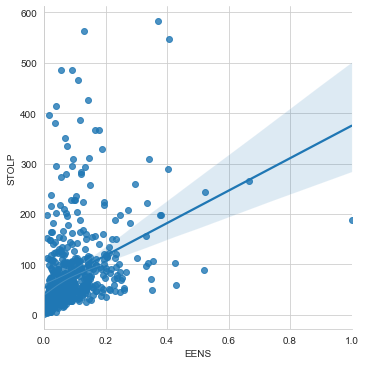

In [67]:


import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.lmplot('EENS', 'STOLP', data=dataset)

In [84]:

from sklearn.cluster import KMeans


kmeans= KMeans(n_clusters= 3)
kmeans.fit(X)

kmeans.cluster_centers_




array([[-5.63785130e-18,  2.30414747e-03,  4.60829493e-03, ...,
         2.30414747e-03,  6.91244240e-03,  6.91244240e-03],
       [ 2.16840434e-18,  7.57575758e-03,  7.57575758e-03, ...,
         1.08420217e-18,  2.60208521e-18,  2.60208521e-18],
       [ 6.66666667e-02,  0.00000000e+00,  8.67361738e-19, ...,
         0.00000000e+00,  8.67361738e-19,  8.67361738e-19]])

In [85]:
print('clusters:\n{}'.format(kmeans.labels_))

clusters:
[2 2 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 2 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 1 0 1 0 0 2 2 0
 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 2 0 1 1 1 1 1
 0 0 1 2 0 0 0 2 0 0 0 0 1 0 0 0 0 0 1 1 2 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 2
 0 0 0 1 0 2 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 2 0 0 1
 1 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 2 0 0 1 0 2 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 2 0 0 2 0 0 1 1 1 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 

In [86]:
#!pip install mglearn

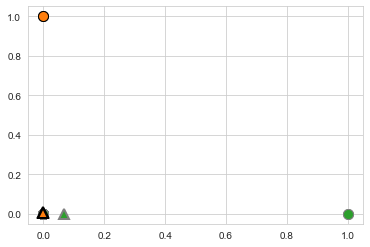

In [75]:
import mglearn
mglearn.discrete_scatter(X.iloc[:,0],X.iloc[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],markers='^',markeredgewidth=2)